-0.016 -0.016 0.738 0.756
in draw_map


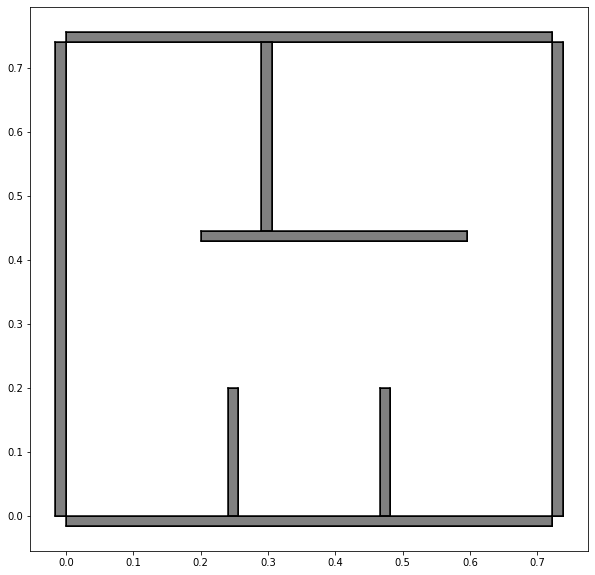

In [3]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString

class Map:
    def __init__(self, objects=None):
        alpha = 0.016
        obj_1 = {
            'upper_right': [0.69+2*alpha  , 0.0], 
            'upper_left': [ 0.0, 0.0], 
            'lower_right': [0.69+2*alpha , -alpha], 
            'lower_left': [0.0, -alpha]
        }

        obj_3 = {
            'upper_right': [0.69+ 2 * alpha  , 0.74+alpha], 
            'upper_left': [ 0.0, 0.74+alpha], 
            'lower_right': [0.69+ 2 * alpha, 0.74], 
            'lower_left': [0.0, 0.74]
        }


        obj_2 = {
            'upper_right': [0.0  , 0.74], 
            'upper_left': [-alpha , 0.74], 
            'lower_right': [0.0, 0.0], 
            'lower_left': [-alpha, 0.0]
        }
        obj_4 = {
            'upper_right': [0.69 + 3 * alpha  , 0.74], 
            'upper_left': [0.69 + 2 * alpha , 0.74], 
            'lower_right': [0.69+ 3 * alpha , 0.0], 
            'lower_left': [0.69+ 2 * alpha , 0.0]
        }

        obj_5 = {
            'upper_right': [0.24+alpha  , 0.2], 
            'upper_left': [0.24 , 0.2], 
            'lower_right': [0.24+alpha, 0.0], 
            'lower_left': [0.24, 0.0]
        }
        obj_6 = {
            'upper_right': [0.45+2*alpha  , 0.2], 
            'upper_left': [0.45+alpha , 0.2], 
            'lower_right': [0.45+2*alpha, 0.0], 
            'lower_left': [0.45+alpha, 0.0]
        }
        obj_7 = {
            'upper_right': [0.29+alpha  , 0.74], 
            'upper_left': [0.29 , 0.74], 
            'lower_right': [0.29+alpha, 0.74-0.295], 
            'lower_left': [0.29, 0.74-0.295]
        }
        obj_8 = {
            'upper_right': [0.58 + alpha  , 0.74-0.295], 
            'upper_left': [0.2 , 0.74-0.295], 
            'lower_right': [0.58+alpha, 0.74-0.295-alpha], 
            'lower_left': [0.2, 0.74-0.295-alpha]
        }


        objects = {
            "obj_1": obj_1, 
            "obj_2": obj_2, 
            "obj_3": obj_3, 
            "obj_4": obj_4, 
            "obj_5": obj_5, 
            "obj_6": obj_6, 
            "obj_7": obj_7, 
            "obj_8": obj_8,
        }
        self.objects = objects
        self.xmin, self.ymin, self.xmax, self.ymax = self.get_map_coordinates()
        print(self.xmin, self.ymin, self.xmax, self.ymax)
    
    def get_lines(self):
        lines = []
        for name, object in self.objects.items():
            lines.append([[object['upper_right'][0], object['upper_right'][1]], [
                object['lower_right'][0], object['lower_right'][1]]])
            lines.append([[object['lower_right'][0], object['lower_right'][1]], [
                object['lower_left'][0], object['lower_left'][1]]])
            lines.append([[object['lower_left'][0], object['lower_left'][1]], [
                object['upper_left'][0], object['upper_left'][1]]])
            lines.append([[object['upper_left'][0], object['upper_left'][1]], [
                object['upper_right'][0], object['upper_right'][1]]])
        return lines

    def draw_map(self):
        print('in draw_map')
        plt.figure(figsize=(10,10))
        for name, object in self.objects.items():
            line1 = [[object['upper_right'][0], object['lower_right'][0]], [
                object['upper_right'][1], object['lower_right'][1]]]
            line2 = [[object['lower_right'][0], object['lower_left'][0]], [
                object['lower_right'][1], object['lower_left'][1]]]
            line3 = [[object['lower_left'][0], object['upper_left'][0]], [
                object['lower_left'][1], object['upper_left'][1]]]
            line4 = [[object['upper_left'][0], object['upper_right'][0]], [
                object['upper_left'][1], object['upper_right'][1]]]
            
            for line in [line1, line2, line3, line4]:
                plt.plot(line[0], line[1], c='black')
                plt.fill("i", "j", facecolor='gray', edgecolor='black', linewidth=1,
                         data={"i": [line1[0], line2[0], line3[0], line4[0]], 
                               "j": [line1[1], line2[1], line3[1], line4[1]]})

    def point_in_object(self, x, y):
        point = Point(x, y)
        for name, object in self.objects.items():
            point1 = object['upper_right']
            point2 = object['lower_right']
            point3 = object['lower_left']
            point4 = object['upper_left']
            poly = Polygon([point1, point2, point3, point4])
            if point.within(poly) or poly.touches(point):
                return True
        return False

    def get_map_coordinates(self):
        x = []
        y = []
        for name, object in self.objects.items():
            for point_name in object:
                point = object[point_name]
                x.append(point[0])
                y.append(point[1])
        return min(x), min(y), max(x), max(y)

    def point_in_map(self, x, y):
        return x < self.xmax and x > self.xmin and y < self.ymax and y > self.ymin

    def valid_point(self, x, y):
        return (not self.point_in_object(x, y)) and (self.point_in_map(x, y))
    
    def find_intersection(self, point_1, point_2, point_3, point_4):
        line1 = LineString([tuple(point_1), tuple(point_2)])
        line2 = LineString([tuple(point_3), tuple(point_4)])
        intersection = line1.intersection(line2)
        return intersection
    
    def find_closest_intersection(self, x1, y1, x2, y2):
        """
        Find closest intersection of a directed line with the map
        """
        min_distance = 0.4
        for line in self.get_lines():
            intersection = self.find_intersection((x1, y1), (x2, y2), line[0], line[1])
            if intersection:
                distance = np.sqrt((intersection.x - x1)**2 + (intersection.y - y1)**2)
                min_distance = min(min_distance, distance)
        return min_distance


map1=Map()   
map1.draw_map()